In [1]:
import wandb
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import json
from collections import Counter

api = wandb.Api()

In [2]:
runs = api.runs("qba/rehersal ResNet CIFAR10 Task IL")

In [3]:
runs_list = []

for run in runs:
    runs_list.append(run.config)

df = pd.DataFrame(runs_list).astype(str)

df

,setup,epochs,dataset,project,pretraining,architecture,learning_rate,rehearsal_dataset,batch_size_rehearsal
0,task IL,5,CIFAR10,rehersal ResNet CIFAR10 Task IL,False,ResNet18,0.005,None,128
1,task IL,5,CIFAR10,rehersal ResNet CIFAR10 Task IL,False,ResNet18,0.005,None,128
2,task IL,5,CIFAR10,rehersal ResNet CIFAR10 Task IL,False,ResNet18,0.005,None,128
3,task IL,5,CIFAR10,rehersal ResNet CIFAR10 Task IL,False,ResNet18,0.005,None,128
4,task IL,5,CIFAR10,rehersal ResNet CIFAR10 Task IL,False,ResNet18,0.005,None,128
5,task IL,5,CIFAR10,rehersal ResNet CIFAR10 Task IL,False,ResNet18,0.0001,None,128
6,task IL,5,CIFAR10,rehersal ResNet CIFAR10 Task IL,False,ResNet18,0.0001,None,128
7,task IL,5,CIFAR10,rehersal ResNet CIFAR10 Task IL,False,ResNet18,0.0001,None,128
8,task IL,5,CIFAR10,rehersal ResNet CIFAR10 Task IL,False,ResNet18,0.0001,None,128
9,task IL,5,CIFAR10,rehersal ResNet CIFAR10 Task IL,False,ResNet18,0.001,None,128


In [4]:
UID = ['rehearsal_dataset', 'batch_size_rehearsal', 'pretraining','learning_rate']
df['UID'] = ''

for c in UID:
    df['UID'] += df[c].astype(str)+';'

In [5]:
unique_UID = df['UID'].unique()
unique_run_params = []

for uuid in unique_UID:
    unique_run_params.append(uuid.split(';')[:4])
unique_run_params

[['None', '128', 'False', '0.005'],
 ['None', '128', 'False', '0.0001'],
 ['None', '128', 'False', '0.001'],
 ['None', '128', 'False', '0.01'],
 ['None', '128', 'False', '0.1'],
 ['stat-wmm', '128', 'False', '0.01'],
 ['stat-wmm', '128', 'True', '0.01']]

In [6]:
unique_run_settings_idxs = []

for run_param in unique_run_params:
    idx = pd.Series([True for _ in range(len(df))])
    for c, v in zip(UID, run_param):
        idx = (idx) & (df[c] == v)
    unique_run_settings_idxs.append(df[idx].index)

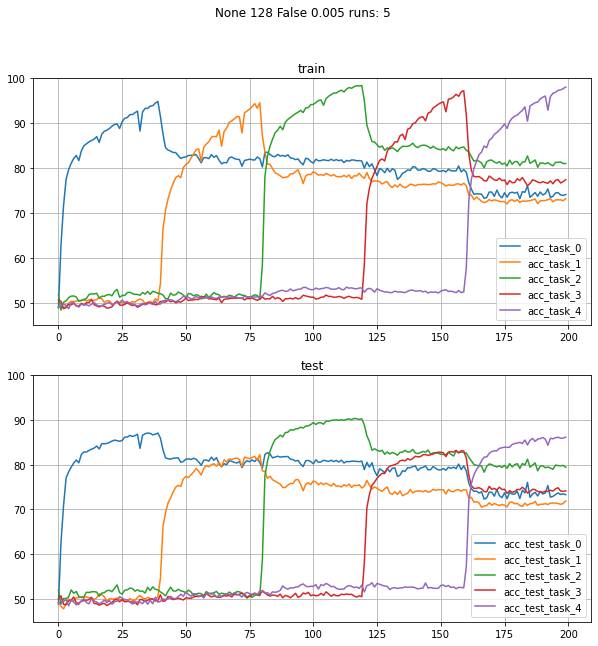

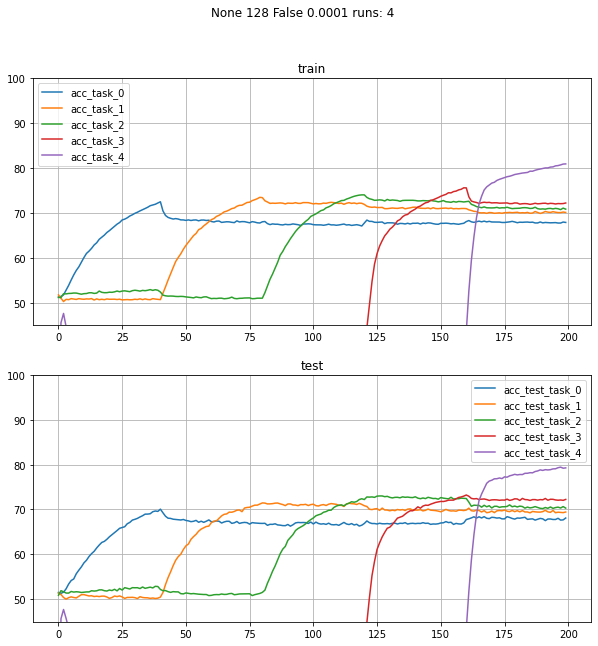

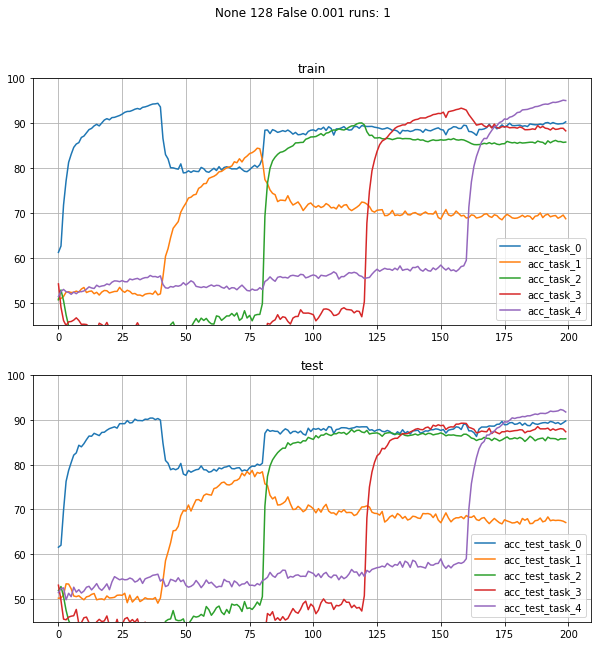

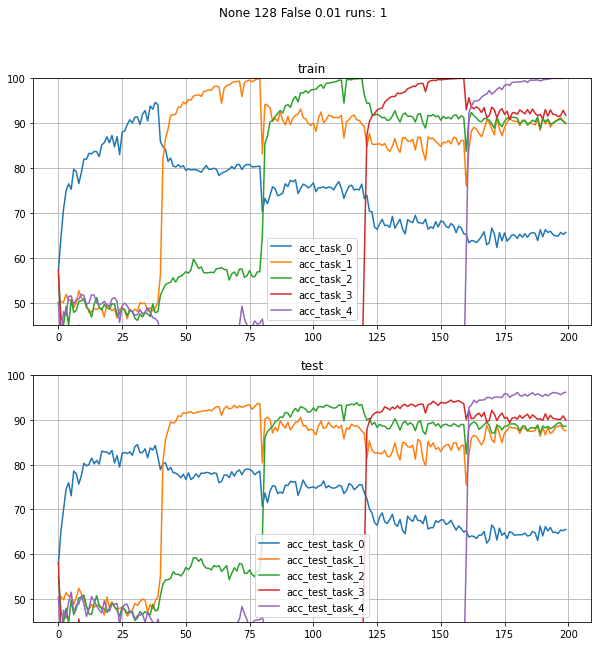

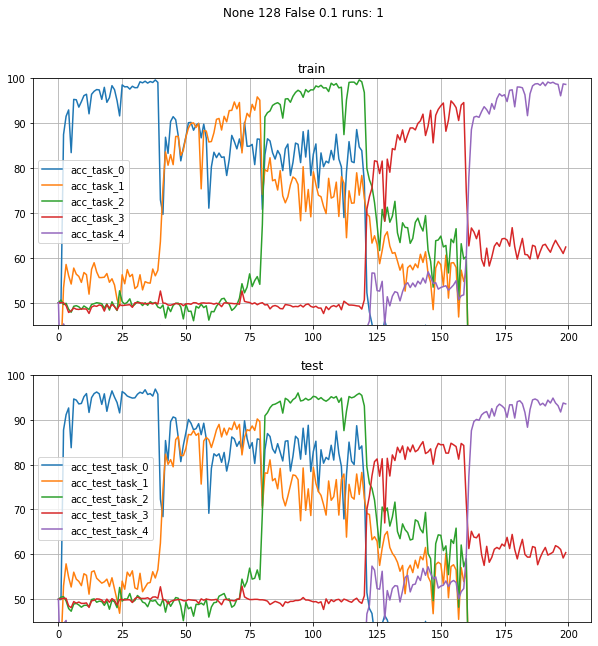

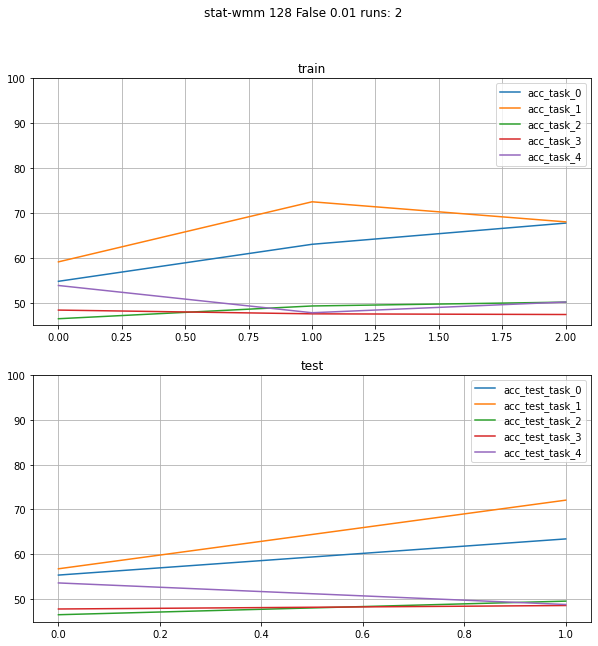

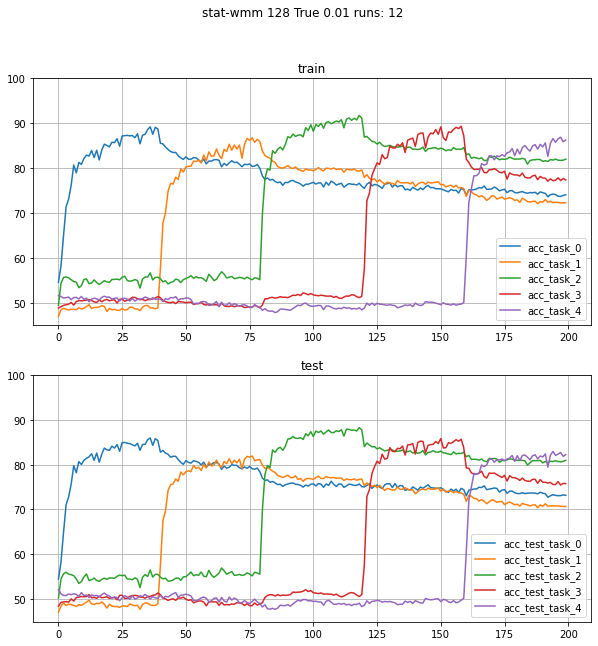

In [7]:
acc_col = ['acc_task_0', 'acc_task_1', 'acc_task_2', 'acc_task_3', 'acc_task_4']
acc_test_col = ['acc_test_task_0', 'acc_test_task_1', 'acc_test_task_2', 'acc_test_task_3', 'acc_test_task_4']

for unixe_idxs in unique_run_settings_idxs:
    df_train, df_test = pd.DataFrame(), pd.DataFrame()
    for run_idx in unixe_idxs.values:
        try:
            curr_run = runs[run_idx].history(10000)
            if len(df_train > 0):
                df_train += curr_run[acc_col].dropna().reset_index().drop(columns='index')
                df_test += curr_run[acc_test_col].dropna().reset_index().drop(columns='index')
            else:
                df_train = curr_run[acc_col].dropna().reset_index().drop(columns='index')
                df_test = curr_run[acc_test_col].dropna().reset_index().drop(columns='index')
        except Exception as e:
            print(f"Error in run: {run_idx} Error: {e}")
    df_train /= len(unixe_idxs)
    df_test /= len(unixe_idxs)

    fig, ax = plt.subplots(2,1)
    fig.set_figheight(10)
    fig.set_figwidth(10)
    fig.suptitle(df.iloc[unixe_idxs]['UID'].iloc[0].replace(';',' ') + f"runs: {len(unixe_idxs)}", fontsize=12)
    df_train.plot(ax=ax[0], grid=True, ylim=[45, 100], title='train')
    df_test.plot(ax=ax[1], grid=True, ylim=[45, 100], title='test')
    plt.show()